## Advanced Lane Finding Project
### Chundi Himakiran Kumar

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.
* Finally to apply the pipeline on a video and output a video with lanes marked.

---


## Camera Calibration using provided chessboard images

In [3]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)


objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

images = glob.glob('camera_cal/calibration*.jpg')

img = cv2.imread(images[0])
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# fig, axs = plt.subplots(5,4, figsize=(16, 12))
# fig.subplots_adjust(hspace = .2, wspace=.001)
# axs = axs.ravel()
# i = 0
#Step through the list and search for chessboard corners
for fname in images:
    #print(fname)
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        # Writing the output images to the output_images folder
        #cv2.imwrite("output_images/"+fname+"_CCoutput"+".jpg",img)


# images = glob.glob('output_images/camera_cal/calibration*.jpg')
# for each in images:
#     img = cv2.imread(each)
#     axs[i].axis('off');
#     axs[i].imshow(img);
#     i+=1




## Calibrate the camera and get the Camera Matrix and Distortion co-efficient

In [4]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

## Function to undistort the  image using mtx and dist obtained above

In [5]:
def cal_undistort(img, mtx, dist):    
    # Use cv2.undistort()    
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    return dst

## Checking distortion correction on test_images

In [6]:
images = glob.glob('test_images/test*.jpg')
for each in images:
    #print(each[12:17])
    img = cv2.imread(each)
    dst = cal_undistort(img,mtx,dist)
    # Saving the undistorted images to the output dir
    #cv2.imwrite("output_images/undistorted_images/"+each[12:17]+".jpg",dst)
images = glob.glob('test_images/straight_lines*.jpg')
for each in images:
    #print(each[12:27])
    img = cv2.imread(each)
    dst = cal_undistort(img,mtx,dist)
    #Saving the undistorted images to the output dir
    #cv2.imwrite("output_images/undistorted_images/"+each[12:27]+".jpg",dst) 
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    dst = cv2.cvtColor(dst,cv2.COLOR_BGR2RGB)
    # Visualizing the distortion
#     f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
#     f.subplots_adjust(hspace = .2, wspace=.05)
#     ax1.imshow(img)
#     ax1.set_title('Original Image', fontsize=30)
#     ax2.imshow(dst)
#     ax2.set_title('Undistorted Image', fontsize=30)

## Selecting Source and Destination points for Perspective Transform 

In [7]:
# Manually selected the source and destination points

src = np.float32([[545,449],[781,449] ,[150,720],[1220,720]])
dst = np.float32([[310,0],[1280,0] ,[310,720],[1220,720]])
# img = mpimg.imread('test_images/test6.jpg')
def do_perspective_transform(img):
    M = cv2.getPerspectiveTransform(src,dst)
    Minv = cv2.getPerspectiveTransform(dst,src)
    warped = cv2.warpPerspective(img,M,(img.shape[1],img.shape[0]),flags=cv2.INTER_LINEAR)
#     f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
#     f.tight_layout()
#     ax1.imshow(img)
#     x = [src[0][0],src[2][0],src[3][0],src[1][0],src[0][0]]
#     y = [src[0][1],src[2][1],src[3][1],src[1][1],src[0][1]]
#     ax1.plot(x, y, color='#ff0000', alpha=0.4, linewidth=3, solid_capstyle='round', zorder=2)
#     ax1.set_title('Original Undistorted Image', fontsize=30)
#     ax2.imshow(warped)
#     x = [dst[0][0],dst[2][0],dst[3][0],dst[1][0],dst[0][0]]
#     y = [dst[0][1],dst[2][1],dst[3][1],dst[1][1],dst[0][1]]
#     ax2.plot(x, y, color='#ff0000', alpha=0.4, linewidth=3, solid_capstyle='round', zorder=2)
#     ax2.set_title('Perspective transformed Image', fontsize=30)
#     plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    return warped,Minv
# do_perspective_transform(img)

## Carrying out Perspective Transform (PT) on all Undistorted test images

In [8]:
images = glob.glob('output_images/undistorted_images/test*.jpg')
for each in images:
    #print(each[33:38])
    img = mpimg.imread(each)
    warped,Minv=do_perspective_transform(img)
    # Save all perspective transformed images in output_images folder
    #cv2.imwrite("output_images/perspective_transformed_images/"+each[33:38]+".jpg",warped)
    #img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    warped = cv2.cvtColor(warped,cv2.COLOR_BGR2RGB)
    # Visualizing the PT
#     f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
#     f.subplots_adjust(hspace = .2, wspace=.05)
#     ax1.imshow(img)
#     ax1.set_title('Original Image', fontsize=30)
#     ax2.imshow(warped)
#     ax2.set_title('PT Image', fontsize=30)
    
images = glob.glob('output_images/undistorted_images/straight_lines*.jpg')
for each in images:
    #print(each[33:48])
    img = mpimg.imread(each)
    warped,Minv=do_perspective_transform(img)
    #Save all perspective transformed images in output_images folder
    #cv2.imwrite("output_images/perspective_transformed_images/"+each[33:48]+".jpg",warped) 
    



## Function to calculate the gradient along a given direction

In [9]:
def abs_sobel_thresh(img, orient='x', thresh_min=0, thresh_max=255):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    # 2) Take the derivative in x or y given orient = 'x' or 'y'
    if(orient=='x'):
        sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
    else:
        sobel = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
    # 3) Take the absolute value of the derivative or gradient
    abs_sobel = np.absolute(sobel)
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))

    # 5) Create a mask of 1's where the scaled gradient magnitude 
            # is > thresh_min and < thresh_max
    mask = (scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[mask]=1
    # 6) Return this mask as your binary_output image
    
    return sxbinary

## Function to calculate the magnitude of the gradient

In [10]:
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    thresh_min = mag_thresh[0]
    thresh_max = mag_thresh[1]
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
    sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
    # 3) Calculate the magnitude 
    abs_sobelxy = np.sqrt(np.power(sobel_x,2)+np.power(sobel_y,2))
    # 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    scaled_sobel = np.uint8(255*abs_sobelxy/np.max(abs_sobelxy))
    # 5) Create a binary mask where mag thresholds are met
    mask = (scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[mask]=1
    # 6) Return this mask as your binary_output image
    
    return sxbinary

## Function to calculate the direction of the gradient

In [11]:
def dir_threshold(img, sobel_kernel, thresh):
    thresh_min = thresh[0]
    thresh_max = thresh[1]
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0,ksize=sobel_kernel)
    sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1,ksize=sobel_kernel)
    # 3) Take the absolute value of the x and y gradients
    abs_sobel_x = np.absolute(sobel_x)
    abs_sobel_y = np.absolute(sobel_y)
    # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient 
    dirn_gradient = np.arctan2(abs_sobel_y, abs_sobel_x)
    # 5) Create a binary mask where direction thresholds are met
    mask = (dirn_gradient >= thresh_min) & (dirn_gradient <= thresh_max)
    # 6) Return this mask as your binary_output image
    sxbinary = np.zeros_like(dirn_gradient)
    sxbinary[mask]=1
    return sxbinary

## Visualizing Sobel thresholds.
[Interactivity in Jupyter Notebooks](https://towardsdatascience.com/a-very-simple-demo-of-interactive-controls-on-jupyter-notebook-4429cf46aabd)

***This link gives us a good way to fine tune parameters by allowing us to interact with the image***

##  Absolute sobel threshold

## Function to visualize images

In [12]:
def visualize_Image(input,output,input_title,output_title):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
    f.subplots_adjust(hspace = .2, wspace=.05)
    ax1.imshow(input);
    ax1.set_title(input_title, fontsize=30)
    ax2.imshow(output, cmap='gray');
    ax2.set_title(output_title, fontsize=30)

## Parameter tuning 

In [13]:
from ipywidgets import interact, interactive, fixed
def abs_sobel_update(thresh_min=21, thresh_max=201):
    test_image = cv2.imread("output_images/perspective_transformed_images/straight_lines1.jpg")
    output_img = abs_sobel_thresh(test_image, 'x', thresh_min, thresh_max)
    # Visualize sobel absolute threshold
    #visualize_Image(test_image,output_img,'Unwarped Image','Sobel Absolute')
    return output_img
# interact(abs_sobel_update, 
#          thresh_min=(0,255), 
#          thresh_max=(0,255));

##  Sobel Magnitude threshold

In [14]:
from ipywidgets import interact, interactive, fixed
def mag_sobel_update(kernel_size=13, min_thresh=25, max_thresh=150):
    test_image = cv2.imread("output_images/perspective_transformed_images/straight_lines1.jpg")
    output_img = mag_thresh(test_image, kernel_size, (min_thresh, max_thresh))
    # Visualize sobel magnitude threshold
    #visualize_Image(test_image,output_img,'Unwarped Image','Sobel Magnitude')
    return output_img
# interact(mag_sobel_update, kernel_size=(3,31,2), 
#                  min_thresh=(0,255), 
#                  max_thresh=(0,255));

##  Sobel Direction threshold

In [15]:
def dir_sobel_update(kernel_size=7, min_thresh=0.2, max_thresh=0.9):
    test_image = cv2.imread("output_images/perspective_transformed_images/straight_lines1.jpg")
    output_img = dir_threshold(test_image, kernel_size, (min_thresh, max_thresh))
    # Visualize sobel direction threshold
    #visualize_Image(test_image,output_img,'Unwarped Image','Sobel Direction')
    return output_img
# interact(dir_sobel_update, kernel_size=(3,31,2), 
#                  min_thresh=(0,np.pi/2,0.01), 
#                  max_thresh=(0,np.pi/2,0.01));

## Sobel Magnitude and Sobel Absolute Threshold

In [16]:
test_image = cv2.imread("output_images/perspective_transformed_images/straight_lines1.jpg")
def abs_mag_sobel_update(mag_kernel_size=13, mag_min_thresh=25, mag_max_thresh=150, abs_min_thresh=21, abs_max_thresh=201):
    output_img_mag = mag_sobel_update(mag_kernel_size, mag_min_thresh, mag_max_thresh)
    output_img_abs = abs_sobel_update(abs_min_thresh, abs_max_thresh)
    combined = np.zeros_like(output_img_mag)
    combined[((output_img_mag == 1) | (output_img_abs == 1))] = 1
    # Visualize sobel magnitude and sobel direction threshold
    #visualize_Image(test_image,combined,'Unwarped Image','Sobel Magnitude and Absolute')

# interact(abs_mag_sobel_update, mag_kernel_size=(1,31,2), 
#                  mag_min_thresh=(0,255), 
#                  mag_max_thresh=(0,255), 
#                  abs_min_thresh=(0,255), 
#                  abs_max_thresh=(0,255));


## Visualize multiple color space channels

In [17]:
test_image = cv2.imread("output_images/perspective_transformed_images/test5.jpg")
test_image_R = test_image[:,:,0]
test_image_G = test_image[:,:,1]
test_image_B = test_image[:,:,2]
test_image_HSV = cv2.cvtColor(test_image, cv2.COLOR_RGB2HSV)
test_image_H = test_image_HSV[:,:,0]
test_image_S = test_image_HSV[:,:,1]
test_image_V = test_image_HSV[:,:,2]
test_image_HLS = cv2.cvtColor(test_image, cv2.COLOR_RGB2HLS)
test_image_HH = test_image_HSV[:,:,0]
test_image_LL = test_image_HSV[:,:,1]
test_image_SS = test_image_HSV[:,:,2]
test_image_LAB = cv2.cvtColor(test_image, cv2.COLOR_RGB2Lab)
test_image_L = test_image_LAB[:,:,0]
test_image_A = test_image_LAB[:,:,1]
test_image_LAB_B = test_image_LAB[:,:,2]
# fig, axs = plt.subplots(4,3, figsize=(16, 12))
# fig.subplots_adjust(hspace = .4, wspace=.001)
# axs = axs.ravel()
# axs[0].imshow(test_image_R, cmap='gray')
# axs[0].set_title('RGB R-channel', fontsize=20)
# axs[1].imshow(test_image_G, cmap='gray')
# axs[1].set_title('RGB G-Channel', fontsize=20)
# axs[2].imshow(test_image_B, cmap='gray')
# axs[2].set_title('RGB B-channel', fontsize=20)
# axs[3].imshow(test_image_H, cmap='gray')
# axs[3].set_title('HSV H-Channel', fontsize=20)
# axs[4].imshow(test_image_S, cmap='gray')
# axs[4].set_title('HSV S-channel', fontsize=20)
# axs[5].imshow(test_image_V, cmap='gray')
# axs[5].set_title('HSV V-Channel', fontsize=20)
# axs[6].imshow(test_image_HH, cmap='gray')
# axs[6].set_title('HLS H-Channel', fontsize=20)
# axs[7].imshow(test_image_LL, cmap='gray')
# axs[7].set_title('HLS L-channel', fontsize=20)
# axs[8].imshow(test_image_SS, cmap='gray')
# axs[8].set_title('HLS S-Channel', fontsize=20)
# axs[9].imshow(test_image_L, cmap='gray')
# axs[9].set_title('LAB L-channel', fontsize=20)
# axs[10].imshow(test_image_A, cmap='gray')
# axs[10].set_title('LAB A-Channel', fontsize=20)
# axs[11].imshow(test_image_LAB_B, cmap='gray')
# axs[11].set_title('LAB B-Channel', fontsize=20)

## Visualizing Colorspaces thresholding
[Colorspaces for lane detection](https://towardsdatascience.com/teaching-cars-to-see-advanced-lane-detection-using-computer-vision-87a01de0424f)
***
**Using the output of the above cell and the information in the above link we shall attempt only the following thresholds**.
**We shall first run the thresholds on one test_image and when we fine tune the thresholds**
**we shall then check the thresholds on all test images**

## RGB R channel Thresholding

In [18]:
def R_threshold(image,thresh=(0, 255)):
    R = image[:,:,0]
    G = image[:,:,1]
    B = image[:,:,2]
    binary = np.zeros_like(R)
    binary[(R > thresh[0]) & (R <= thresh[1])] = 1
    return binary

## HLS S-channel Thresholding

In [19]:
def S_threshold(image,thresh=(0, 255)):
    hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    H = hls[:,:,0]
    L = hls[:,:,1]
    S = hls[:,:,2]
    binary = np.zeros_like(S)
    binary[(S > thresh[0]) & (S <= thresh[1])] = 1
    return binary

## HLS L-channel Thresholding

In [20]:
def L_threshold(image,thresh=(0, 255)):
    hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    H = hls[:,:,0]
    L = hls[:,:,1]
    S = hls[:,:,2]
    L = L*(255/np.max(L))
    binary = np.zeros_like(L)
    binary[(L > thresh[0]) & (L <= thresh[1])] = 1
    return binary

## HSV V-channel Thresholding

In [21]:
def V_threshold(image,thresh=(0, 255)):
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    H = hsv[:,:,0]
    S = hsv[:,:,1]
    V = hsv[:,:,2]
    binary = np.zeros_like(V)
    binary[(V > thresh[0]) & (V <= thresh[1])] = 1
    return binary

## LAB L-channel Thresholding

In [22]:
def Lab_L_threshold(image,thresh=(0, 255)):
    lab = cv2.cvtColor(image, cv2.COLOR_RGB2Lab)
    L = lab[:,:,0]
    A = lab[:,:,1]
    B = lab[:,:,2]
    binary = np.zeros_like(L)
    binary[(L > thresh[0]) & (L <= thresh[1])] = 1
    return binary

## LAB B-channel Thresholding

In [23]:
def Lab_B_threshold(image,thresh=(0, 255)):
    lab = cv2.cvtColor(image, cv2.COLOR_RGB2Lab)
    L = lab[:,:,0]
    A = lab[:,:,1]
    B = lab[:,:,2]
    binary = np.zeros_like(B)
    if np.max(B) > 175:
        B= B*(255/np.max(B))
    binary[(B > thresh[0]) & (B <= thresh[1])] = 1
    return binary

## Visualizing Various Thesholding to select the best possible combination

In [24]:
test_image = cv2.imread("output_images/perspective_transformed_images/straight_lines1.jpg")#150,221
def R_color_update(min_thresh=224, max_thresh=255):
    output_img_R = R_threshold(test_image,(min_thresh, max_thresh)) 
    # Visualize R-channel threshold
    #visualize_Image(test_image,output_img_R,'Undistorted Image','RGB R-Channel')
    #plt.imsave('output_images/threshold_output/straight_lines1_RGB_R.jpg',output_img_R,cmap=mpimg.cm.gray)
    
# interact(R_color_update,
#          min_thresh=(0,255), 
#          max_thresh=(0,255));



In [25]:
test_image = cv2.imread("output_images/perspective_transformed_images/straight_lines1.jpg")
def S_color_update(min_thresh=90, max_thresh=255):
    output_img_S = S_threshold(test_image,(min_thresh, max_thresh)) 
    # Visualize HLS S-channel threshold
    #visualize_Image(test_image,output_img_S,'Undistorted Image','HLS S-Channel')
    #plt.imsave('output_images/threshold_output/straight_lines1_HLS_S.jpg',output_img_S,cmap=mpimg.cm.gray)
    
# interact(S_color_update,
#          min_thresh=(0,255), 
#          max_thresh=(0,255));


In [26]:
test_image = cv2.imread("output_images/perspective_transformed_images/straight_lines1.jpg")
def L_color_update(min_thresh=220, max_thresh=255):
    output_img_L = L_threshold(test_image,(min_thresh, max_thresh)) 
    
    # Visualize HLS L-channel threshold
    #visualize_Image(test_image,output_img_L,'Undistorted Image','HLS L-Channel')
    #plt.imsave('output_images/threshold_output/straight_lines1_HLS_L.jpg',output_img_L,cmap=mpimg.cm.gray)
    
# interact(L_color_update,
#          min_thresh=(0,255), 
#          max_thresh=(0,255));

In [27]:
test_image = cv2.imread("output_images/perspective_transformed_images/straight_lines1.jpg")
def V_color_update(min_thresh=120, max_thresh=255):
    output_img_V = V_threshold(test_image,(min_thresh, max_thresh)) 
    # Visualize HSV V-channel threshold
    #visualize_Image(test_image,output_img_V,'Undistorted Image','HSV V-Channel')
    #plt.imsave('output_images/threshold_output/straight_lines1_HSV_V.jpg',output_img_V,cmap=mpimg.cm.gray)
# interact(V_color_update,
#          min_thresh=(0,255), 
#          max_thresh=(0,255));

In [28]:
test_image = cv2.imread("output_images/perspective_transformed_images/straight_lines1.jpg")
def L_color_update(min_thresh=125, max_thresh=250):
    output_img_L = L_threshold(test_image,(min_thresh, max_thresh))
    # Visualize LAB L-channel threshold
    #visualize_Image(test_image,output_img_L,'Undistorted Image','LAB L-Channel')
    #plt.imsave('output_images/threshold_output/straight_lines1_LAB_L.jpg',output_img_L,cmap=mpimg.cm.gray)
# interact(L_color_update,
#          min_thresh=(0,255), 
#          max_thresh=(0,255));

In [29]:
test_image = cv2.imread("output_images/perspective_transformed_images/straight_lines1.jpg")
def Lab_B_color_update(min_thresh=190, max_thresh=255):
    output_img_B = Lab_B_threshold(test_image,(min_thresh, max_thresh))
    # Visualize LAB B-channel threshold
    #visualize_Image(test_image,output_img_B,'Undistorted Image','LAB B-Channel')
    #plt.imsave('output_images/threshold_output/straight_lines1_LAB_B.jpg',output_img_B,cmap=mpimg.cm.gray)
# interact(Lab_B_color_update,
#          min_thresh=(0,255), 
#          max_thresh=(0,255));

## First Stage Pipeline for  Image processing
### Takes an image and returns the lanes found 

In [30]:
from PIL import Image
def  img_processing_pipeline(img):
    # Undistort
    img_undistort = cal_undistort(img, mtx, dist) # mtx and dist are availabe having been calculated already
    
    # Perspective Transform
    warped,Minv = do_perspective_transform(img_undistort)

    # Sobel Absolute and Sobel Maginitude (using default parameters)
    img_sobelAbsMag = abs_mag_sobel_update(warped)
    
    # RGB R channel Threshold 
    #img_RGB_R = R_threshold(warped,(150,221))
    
    # HLS S-channel Threshold 
    #img_HLS_S = S_threshold(warped,(90,255))
    
    # HLS L-channel Threshold 
    img_HLS_L = L_threshold(warped,(220,255))

    # HSV V-channel Threshold 
    #img_HSV_V = V_threshold(warped,(120,255))

    # Lab L-channel Threshold 
    #img_LAB_L = Lab_L_threshold(warped,(125,250))
    
    # Lab B-channel Threshold 
    img_LAB_B = Lab_B_threshold(warped,(190,255))
    
    # After trial and error we find that HLS_L and LAB_B together give the best output
    combined = np.zeros_like(img_HLS_L)
    combined[(img_HLS_L == 1) | (img_LAB_B == 1) | (img_sobelAbsMag == 1)]=1 
    return (combined,Minv,img_undistort)

# test_image = mpimg.imread("test_images/straight_lines1.jpg")
# out_img,Minv = img_processing_pipeleine(test_image)
# # Visualize Final Image Processed
# visualize_Image(test_image,out_img,'Test Image','Lane image')
images = glob.glob('test_images/test*.jpg')
for each in images:
    #print(each[12:17])
    test_img = mpimg.imread(each)
    out_img,Minv,_=img_processing_pipeline(test_img)
    #visualize_Image(test_img,out_img,str(each),'Lane image')
    # Save all perspective transformed images in output_images folder
    #plt.imsave('output_images/pipeline_output/'+each[12:17]+"_final_output"+".jpg",out_img,cmap=mpimg.cm.gray)
#images = glob.glob('test_images/straight_lines*.jpg')
for each in images:
    #print(each[12:27])
    test_img = mpimg.imread(each)
    out_img,Minv,_=img_processing_pipeline(test_img)
    #visualize_Image(test_img,out_img,str(each),'Lane image')
    #Save all perspective transformed images in output_images folder
    #plt.imsave('output_images/pipeline_output/'+each[12:27]+"_final_output"+".jpg",out_img,cmap=mpimg.cm.gray)


## Detecting lanes using sliding windows

## Fitting lanes for subsequent frames

In [31]:
""" These two functions come into play for subsequent frames.
Instead of using the Line Class to keep track of the lanes parameters
we have hardcoded the exceptions here which will force these functions
to go back to the original sliding window function that shall calculate
the parameters from the beginning by drawing the histogram """

def fit_poly(img_shape, leftx, lefty, rightx, righty):
    ### Fit a second order polynomial to each with np.polyfit() ###
    try:
        left_fit = np.polyfit(lefty, leftx, 2)
        right_fit = np.polyfit(righty, rightx, 2)
        # Generate x and y values for plotting
        ploty = np.linspace(0, img_shape[0]-1, img_shape[0])
        ###Calc both polynomials using ploty, left_fit and right_fit ###
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
        return left_fitx, right_fitx, ploty
    ### If the fitting is not proper return None which shall be checked 
    ### and action taken
    except:
        return None,None,None
    
    
    

def search_around_poly(binary_warped,left_fit,right_fit):
    # HYPERPARAMETER
    # The width of the margin around the previous polynomial to search
    # 
    margin = 50

    # Grab activated pixels
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    
    ### Set the area of search based on activated x-values ###
    ### within the +/- margin of our polynomial function ###
    
    left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + 
                    left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + 
                    left_fit[1]*nonzeroy + left_fit[2] + margin)))
    right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + 
                    right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + 
                    right_fit[1]*nonzeroy + right_fit[2] + margin)))
    
    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    
#     print("length of leftx : {}".format(len(leftx)))
#     print("length of lefty : {}".format(len(lefty)))
#     print("length of rightx : {}".format(len(rightx)))
#     print("length of righty : {}".format(len(righty)))

    ## Here again we check for errors and call the original sliding window function
    if(len(leftx)==0 | len(lefty)==0 | len(rightx)==0 | len(righty) == 0):
        # for debugging ... dont mind print("reached-0")
        result,left_fitx,right_fitx,ploty,left_fit_cr,right_fit_cr = fit_polynomial(binary_warped,[],[])
        
    else:
        # Fit new polynomials
        left_fitx, right_fitx, ploty = fit_poly(binary_warped.shape, leftx, lefty, rightx, righty)
        if((left_fitx is None) | (right_fitx is None) | (ploty is None)):
            result,left_fitx,right_fitx,ploty,left_fit_cr,right_fit_cr = fit_polynomial(binary_warped,[],[])
        else:
            # Calculating real world curvature here . So no need to pass leftx,lefty and rightx,right as arguments

            # Define conversions in x and y from pixels space to meters
            ym_per_pix = 30.0/720 # meters per pixel in y dimension
            xm_per_pix = 3.7/700 # meters per pixel in x dimension

            if len(leftx) != 0 and len(rightx) != 0:
                # Fit new polynomials to x,y in world space
                left_fit_cr = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
                right_fit_cr = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)

    
    
    return result,left_fitx,right_fitx,ploty,left_fit_cr,right_fit_cr


## Fitting lanes for the first frame .. The two functions below calculate the parameters
## from the histogram onwards. Instead of the Lanes class the exceptions are hardcoded here
##  and decision is taken whether to do the calculations here or send it to the above functions

In [118]:
""" Important : We tried to use SCIPY's SAVITZKY-GOLAY-FILTER to curb noise in the y axis points and
    see if it improves our lane detection. We tried to use this low pass filter to curb the noise generated in the y points.
    however it has not had much perceivable effect and time was short for tuning its parameters also. Hence commented it out."""

import scipy.signal as ss

def find_lane_pixels(binary_warped):
    #debugging.. dont mind ..print("reached-2")
    
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    #print(binary_warped.shape[0])
    #plt.plot(histogram)
    
    # Create an output image to draw on and visualize the result
    out_img = binary_warped#np.dstack((binary_warped, binary_warped, binary_warped))
    
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]//2)
    # After review 2, We are changing the hyper parameters to completely find the stright lines
    # and the curves
    #print(midpoint)
    leftx_base = np.argmax(histogram[0:midpoint],axis=0)[0]
    #print(leftx_base)
    rightx_base = np.argmax(histogram[midpoint:],axis=0)[0]+midpoint
    #print(rightx_base)
    #print(midpoint,leftx_base,rightx_base)
    # HYPERPARAMETERS
    # Choose the number of sliding windows
    nwindows = 20
    # Set the width of the windows +/- margin
    margin = 120
    # Set minimum number of pixels found to recenter window
    minpix = 45

    # Set height of windows - based on nwindows above and image shape
    window_height = np.int(binary_warped.shape[0]//nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated later for each window in nwindows
    leftx_current = leftx_base
    rightx_current = rightx_base

    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        # print((win_xleft_low,win_y_low),(win_xleft_high,win_y_high))
        # print((win_xright_low,win_y_low),(win_xright_high,win_y_high))
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),
        (win_xleft_high,win_y_high),(0,255,0), 2) 
        
        cv2.rectangle(out_img,(win_xright_low,win_y_low),
        (win_xright_high,win_y_high),(0,255,0), 2) 
        
        
        
        # Identify the nonzero pixels in x and y within the window #
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
        
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        #print(left_lane_inds)
        
        """The below parameter is our addition to the code. The logic is in absence of data points
         we shift the leftx and rightx by this much amount. The shifting is done by calculating the curvature
         of the previous points. However this did not play along well and i am running short of time and in a 
         hurry to submit the project..so have commented it out.
        """
        _margin = 10
        
        
        good_left_inds_y = np.array(nonzeroy[good_left_inds])
        good_left_inds_x = np.array(nonzerox[good_left_inds])
        good_right_inds_y = np.array(nonzeroy[good_right_inds])
        good_right_inds_x = np.array(nonzerox[good_right_inds])
        
        # We calculate the curvature and accordingly the sliding windows
        # slide left or right
        
#         try:
#             left_lane_cr = np.polyfit(good_left_inds_y, good_left_inds_x, 2)
#             right_lane_cr = np.polyfit(good_right_inds_y, good_right_inds_x, 2)
#             if(left_lane_cr < 0 & right_lane_cr < 0):
#                 _margin= -_margin
#         except:
#             # Avoids error due to no data above
#             pass
        
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        # test code if less px than minpx found shift write by arbitrary _margin pixels
#         else:
#             leftx_current = leftx_current +_margin
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))
#         else:
#             rightx_current =  rightx_current +_margin
    # Concatenate the arrays of indices (previously was a list of lists of pixels)
    try:
        left_lane_inds = np.concatenate(left_lane_inds)
        right_lane_inds = np.concatenate(right_lane_inds)
        # Extract left and right line pixel positions
        leftx = nonzerox[left_lane_inds]
        #print(leftx)
        lefty = nonzeroy[left_lane_inds] 
        rightx = nonzerox[right_lane_inds]
        righty = nonzeroy[right_lane_inds]
        return leftx, lefty, rightx, righty, out_img
    except ValueError:
        # Avoids an error if the above is not implemented fully
        pass



    


def fit_polynomial(binary_warped,left_fit,right_fit):
    # If the first frame is coming in then left and right fit are None
    # and we shall have to calculate them
    # debugging dont mind ..print("reached-1")
    if ((len(left_fit) == 0) & (len(right_fit) == 0)):
        # Find our lane pixels first
        leftx, lefty, rightx, righty, out_img = find_lane_pixels(binary_warped)
        out_img = out_img.copy()
        #print(rightx)
        # Fit a second order polynomial to each using `np.polyfit`
        # Fit a second order polynomial to each using `np.polyfit`
        # test code use savitzky_golay filter here
        # ysg = savitzky_golay(y, window_size=31, order=4)
        # TO-DO the parameters 31,4 need to be tuned.
        try:   
    #     lefty = ss.savgol_filter(lefty, 3, 2)
    #     righty = ss.savgol_filter(righty, 3, 2)
    #     lefty = lefty.astype(int)
    #     righty = righty.astype(int)
            left_fit = np.polyfit(lefty, leftx, 2)
            right_fit = np.polyfit(righty, rightx, 2)
            #print(left_fit,right_fit)
        except:
            left_fit=1
            right_fit=1
            #print(left_fit,right_fit)
            pass

        # The above values need to be set manually for the next frame code.
        #ignore the few top 360 pixels. So start at 360 bixels
    
        # Generate x and y values for plotting
        # ignore the few top 360 pixels as generally the top image is devoid of lane ixels
        ploty = np.linspace(360, binary_warped.shape[0]-1, binary_warped.shape[0] )
        try:
            left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
            right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
        except TypeError:
            # Avoids an error if `left` and `right_fit` are still none or incorrect
            print('The function failed to fit a line!')
            left_fitx = 1*ploty**2 + 1*ploty
            right_fitx = 1*ploty**2 + 1*ploty

        
        """Due to SG filter some lefty values are above the image shape size. hence the code below"""
    
        lefty[lefty > binary_warped.shape[0]] = binary_warped.shape[0]
        righty[righty > binary_warped.shape[0]] = binary_warped.shape[0]
    
        # Colors in the left and right lane regions
        out_img[lefty, leftx] = [255, 0, 0]
        out_img[righty, rightx] = [0, 0, 255]

        # Calculating real world curvature here . So no need to pass leftx,lefty and rightx,right as arguments
    
        # Define conversions in x and y from pixels space to meters
        ym_per_pix = 30.0/720 # meters per pixel in y dimension
        xm_per_pix = 3.7/700 # meters per pixel in x dimension
    
        if len(leftx) != 0 and len(rightx) != 0:
            # Fit new polynomials to x,y in world space
            left_fit_cr = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
            right_fit_cr = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)

        return out_img,left_fitx,right_fitx,ploty,left_fit_cr,right_fit_cr
    
    else:
        # It is a subsequent frame . so we shall call the prev-poly module
        out_img,left_fitx,right_fitx,ploty,left_fit_cr,right_fit_cr = search_around_poly(binary_warped,left_fit,right_fit)
        return out_img,left_fitx,right_fitx,ploty,left_fit_cr,right_fit_cr


## Testing lane detection using sliding window on all pipeline output images

In [119]:
#Function to visualize lane images
def visualize_Lane_Image(input_img,output_img,input_title,output_title):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
    f.subplots_adjust(hspace = .2, wspace=.05)
    ax1.imshow(input_img);
    ax1.set_title(input_title, fontsize=20)
    ax2.imshow(output_img);
    ax2.set_title(output_title, fontsize=20)

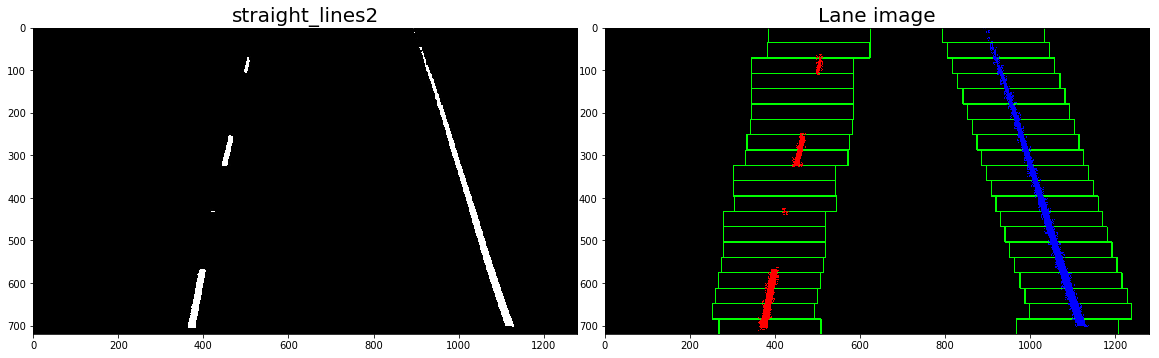

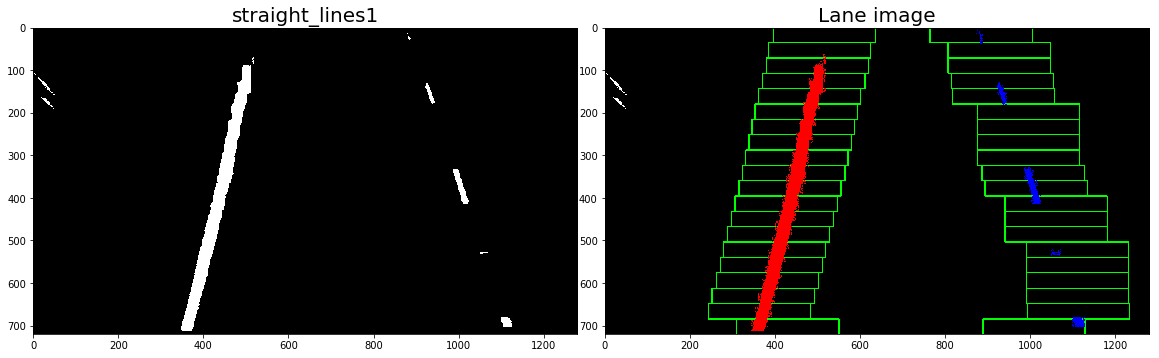

In [120]:

images = glob.glob('output_images/pipeline_output/straight_lines*.jpg')
for each in images:
    #print(each[30:45])
    in_img = mpimg.imread(each)
    binary_warped = in_img.copy()
    out_img,_,_,_,_,_ = fit_polynomial(binary_warped,[],[])
    #visualize_Lane_Image(in_img,out_img,each[30:45],'Lane image')
    #Save all lane detected images in output_images folder
    #plt.imsave('output_images/lane_detected/'+each[30:45]+"_lane_drawn"+".jpg",out_img,cmap=mpimg.cm.gray)
    


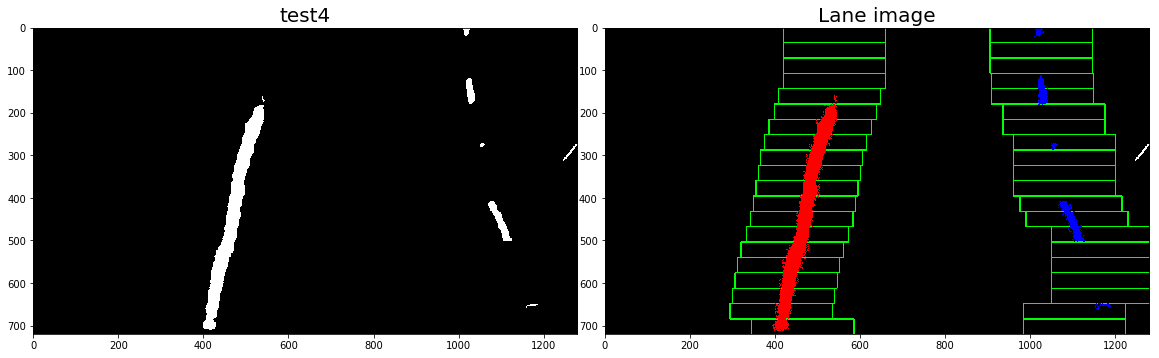

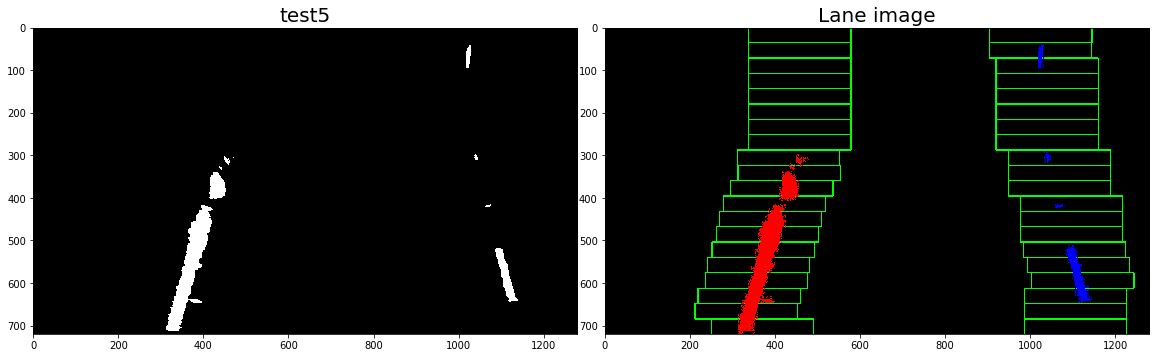

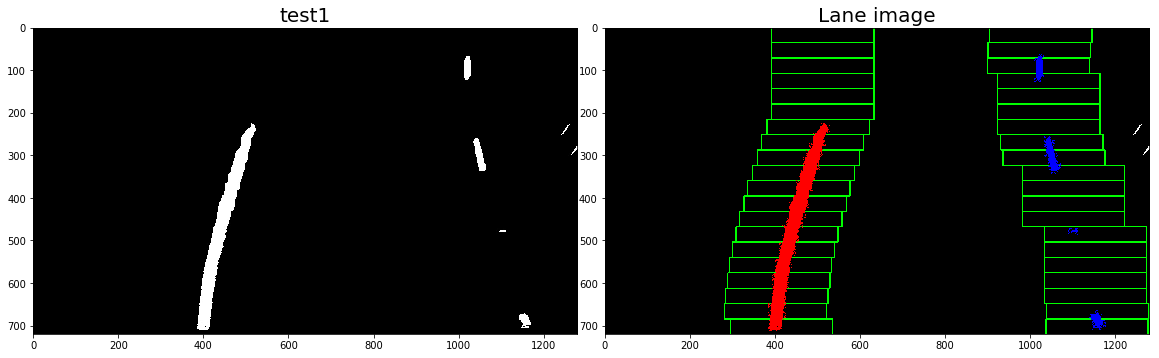

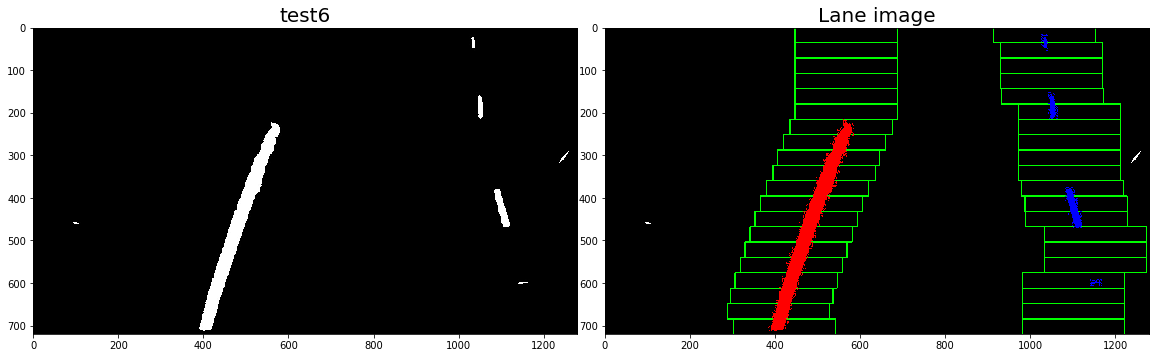

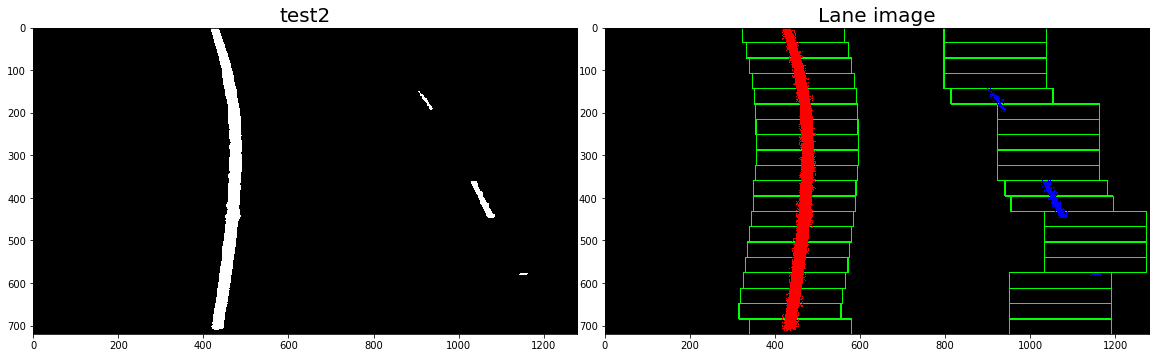

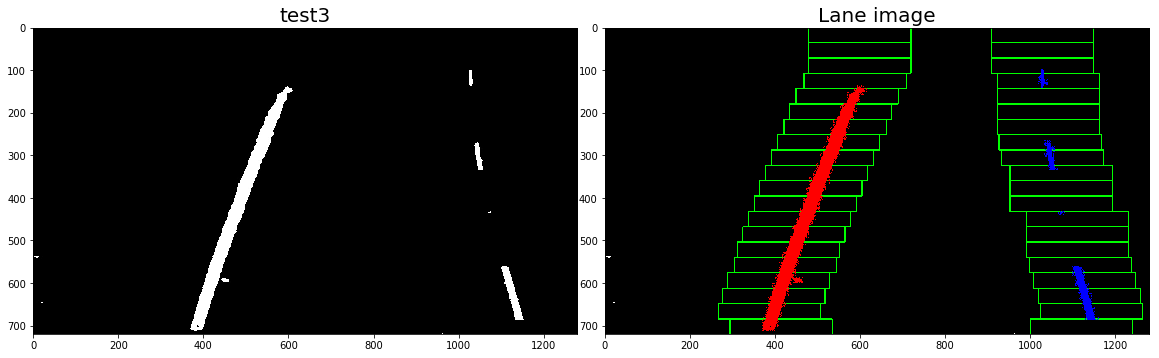

In [122]:
images = glob.glob('output_images/pipeline_output/test*.jpg')
for each in images:
    #print(each[30:35])
    in_img = mpimg.imread(each)
    binary_warped = in_img.copy()
    out_img,_,_,_,_,_=fit_polynomial(binary_warped,[],[])
    #visualize_Lane_Image(in_img,out_img,each[30:35],'Lane image')
    #Save all perspective transformed images in output_images folder
    #plt.imsave('output_images/lane_detected/'+each[30:35]+"_lane_drawn"+".jpg",out_img,cmap=mpimg.cm.gray)



# Marking the lanes on original image


## Image processing Pipeline final

In [123]:
#Function to visualize Final images
def visualize_Final_Image(input_img,output_img,input_title,output_title):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
    f.subplots_adjust(hspace = .2, wspace=.05)
    ax1.imshow(input_img);
    ax1.set_title(input_title, fontsize=20)
    ax2.imshow(output_img);
    
    ax2.set_title(output_title, fontsize=20)

## This is the final image processing pipeline 

In [151]:
def  img_processing_pipeline_final(img,left_fit=[],right_fit=[]):
    (temp_output_img,Minv,undistort) = img_processing_pipeline(img)
    plt.imsave('temp_output_img'+".jpg",temp_output_img,cmap=mpimg.cm.gray)
    binary_warped = mpimg.imread('temp_output_img.jpg')
    final_output_img,left_fitx,right_fitx,ploty,left_fit_cr,right_fit_cr = fit_polynomial(binary_warped,left_fit,right_fit)
    gray_final = cv2.cvtColor(final_output_img, cv2.COLOR_BGR2GRAY)
    #print(left_fitx,right_fitx,ploty)
    # Create an image to draw the lines on
    warp_zero = np.zeros_like(gray_final).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))
    #print(color_warp.shape)
    # Recast the x and y points into usable format for cv2.fillPoly()    
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw lane lines : Post review 2, changed color and thickness for clear detection of lane lines
    cv2.polylines(color_warp, np.int32([pts_left]), isClosed=False, color=(255,0,), thickness=35)
    cv2.polylines(color_warp, np.int32([pts_right]), isClosed=False, color=(255,0,0), thickness=35)
    
    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, Minv, (img.shape[1], img.shape[0])) 
    # Combine the result with the original image
    result = cv2.addWeighted(undistort, 1, newwarp, 0.5, 0)
    
    # Define conversions in x and y from pixels space to meters
    ym_per_pix = 30.0/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension
    
    # Define y-value where we want radius of curvature
    # We'll choose the maximum y-value, corresponding to the bottom of the image
    y_eval = np.max(ploty)
    
    
    
        
    # Calculation of R_curve (radius of curvature)
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    
    h = img.shape[0]*xm_per_pix
    # Distance from center is image x midpoint - mean of l_fit and r_fit intercepts 
    center_dist=0
    if right_fitx is not None and left_fitx is not None:
        car_position = (img.shape[1]/2)*xm_per_pix
        l_fit_x = left_fit_cr[0]*(h**2) + left_fit_cr[1]*h + left_fit_cr[2]
        r_fit_x = right_fit_cr[0]*(h**2) + right_fit_cr[1]*h + right_fit_cr[2]
        lane_center = (r_fit_x + l_fit_x) /2
        # center_distance in pixels and not meters
        center_dist = (car_position - lane_center)
    curvature = (left_curverad+right_curverad)/2.0
    text = 'Curve radius: ' + '{:04.2f}'.format(curvature) + 'm'
    font = cv2.FONT_HERSHEY_PLAIN 
    
    direction = ''
    #Estimation of Vehicle Position
    if center_dist > 0:
        direction = 'right'
    elif center_dist < 0:
        direction = 'left'
    abs_center_dist = abs(center_dist)
    
    text = 'Radius of curvature = ' + '{:04.2f}'.format(curvature) + '(m)'
    cv2.putText(result, text, (40,80), font, 1.5, (255,255,255), 2, cv2.LINE_AA)
    text = 'Vehicle is ' + '{:04.2f}'.format(abs_center_dist) + 'm ' + direction + ' of center'
    cv2.putText(result, text, (40,120), font, 1.5, (255,255,255), 2, cv2.LINE_AA)
    
    #visualize_Final_Image(img,result,'input','output')
    return result,left_fitx,right_fitx
    



## Visualizing the lane detection on test images and checking the pipeline

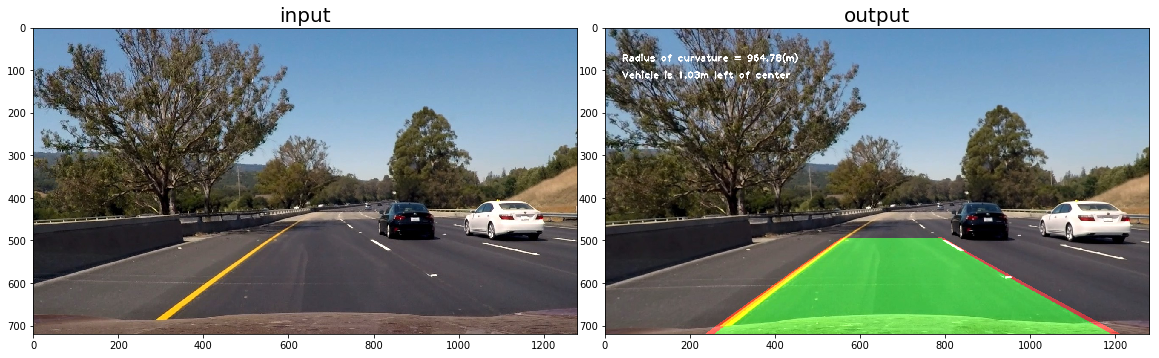

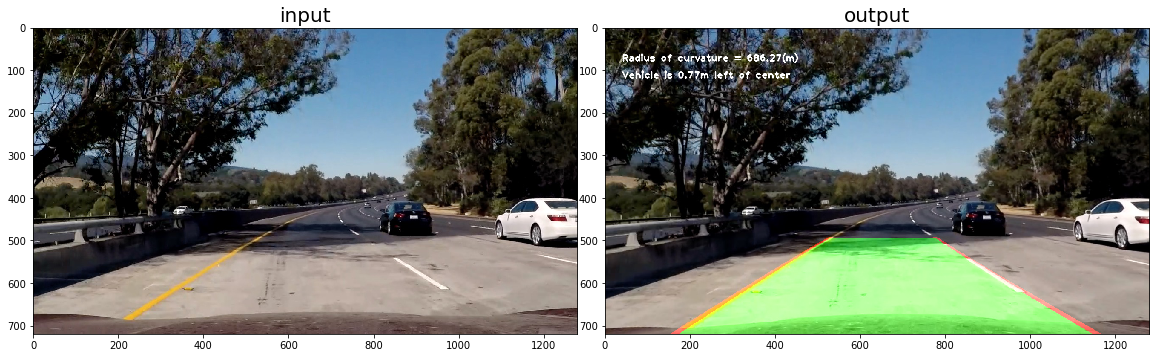

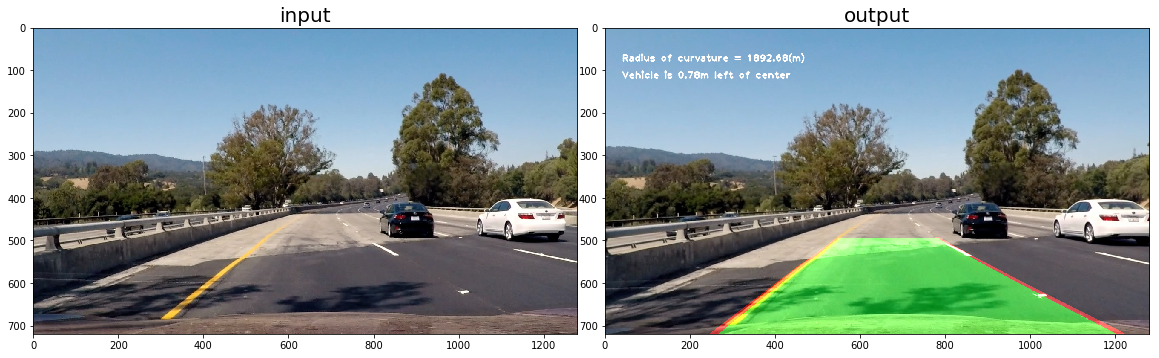

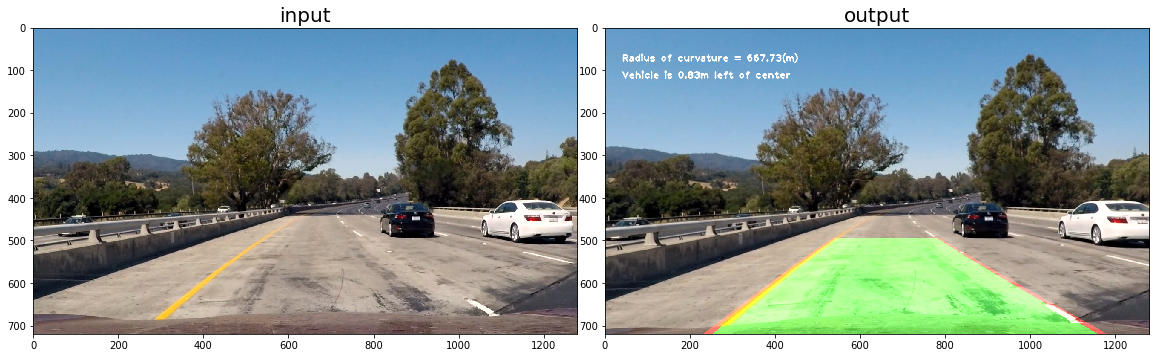

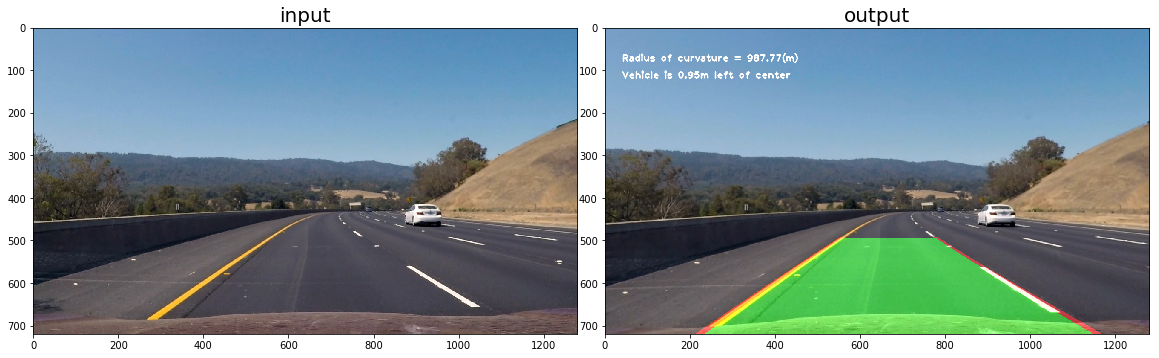

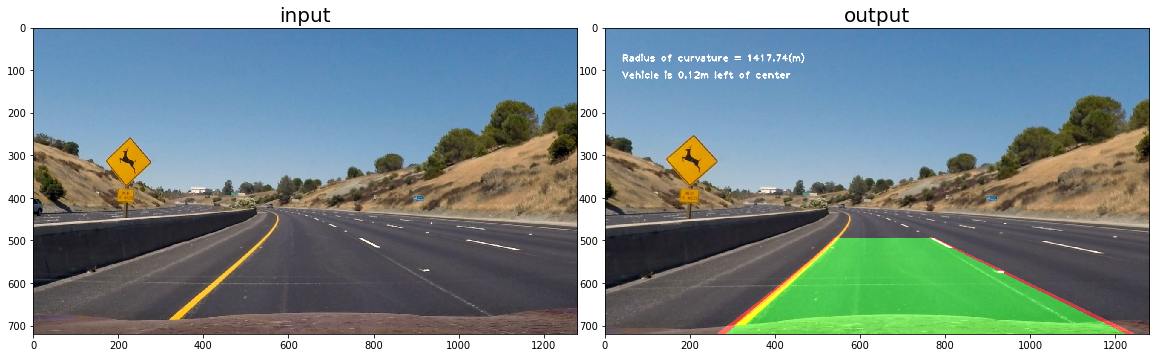

In [148]:
images = glob.glob('test_images/test*.jpg')
for each in images:
    #print(each[12:17])
    img = cv2.cvtColor(cv2.imread(each), cv2.COLOR_BGR2RGB)
    result,_,_=img_processing_pipeline_final(img,[],[])
    # Saving the undistorted images to the output dir
    plt.imsave("output_images/final_output/"+ each[12:17]+".jpg",result)

# Import everything needed to edit/save/watch video clips


In [152]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML


In [153]:
left_fit = []
right_fit = []
def process_image(image):
    
    global left_fit,right_fit
    result_img,left_fit,right_fit = img_processing_pipeline_final(image,left_fit,right_fit)   
    return result_img

In [155]:
output = 'project_video_output.mp4'
input_video = VideoFileClip("project_video.mp4")
output_video = input_video.fl_image(process_image) 
# Saving the output video
%time output_video.write_videofile(output, audio=False)

[MoviePy] >>>> Building video project_video_output.mp4
[MoviePy] Writing video project_video_output.mp4


100%|█████████▉| 1260/1261 [16:01<00:00,  1.87it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_output.mp4 

CPU times: user 20min 26s, sys: 1min 43s, total: 22min 9s
Wall time: 16min 3s


In [157]:
# output = 'challenge_video_output.mp4'
# input_video = VideoFileClip("challenge_video.mp4")
# output_video = input_video.fl_image(process_image) 
# # Saving the output video
# %time output_video.write_videofile(output, audio=False)
# # still to try
# # check again